<a href="https://colab.research.google.com/github/ajaykumar8/Multi-Class-Classification-with-the-Reuters-Dataset/blob/main/Classifying_News_Articles_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build the multi-class classification model that we built in class.

Classifying newswires: A multiclass classification example
The Reuters dataset

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data,test_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 8s 371ms/step - loss: 2.7322 - accuracy: 0.4986 - val_loss: 1.8515 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 5s 305ms/step - loss: 1.5306 - accuracy: 0.6887 - val_loss: 1.3578 - val_accuracy: 0.6910
Epoch 3/20
16/16 [==============================] - 5s 302ms/step - loss: 1.1652 - accuracy: 0.7407 - val_loss: 1.1731 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 5s 333ms/step - loss: 0.9492 - accuracy: 0.7940 - val_loss: 1.0611 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 4s 221ms/step - loss: 0.7837 - accuracy: 0.8299 - val_loss: 0.9760 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 90ms/step - loss: 0.6539 - accuracy: 0.8591 - val_loss: 0.9258 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 67ms/step - loss: 0.5445 - accuracy: 0.8819 - val_loss: 0.9203 - val_accuracy: 0.7920
Epoch 8/

At epoch we achieved accuracy of 0.95 after which the epoch dont improve the accuracy that much and model might overfit , we should limit the epochs to 15.

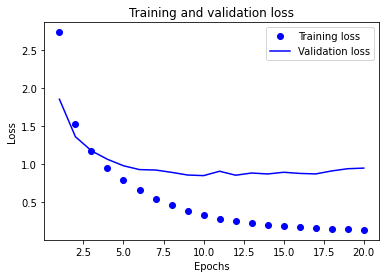

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

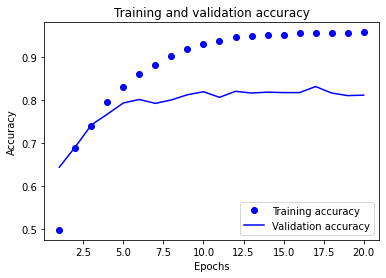

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 54ms/step - loss: 2.5960 - accuracy: 0.4606
Epoch 2/9
18/18 [==============================] - 1s 49ms/step - loss: 1.4717 - accuracy: 0.6859
Epoch 3/9
18/18 [==============================] - 1s 65ms/step - loss: 1.1442 - accuracy: 0.7525
Epoch 4/9
18/18 [==============================] - 2s 86ms/step - loss: 0.9353 - accuracy: 0.8020
Epoch 5/9
18/18 [==============================] - 1s 77ms/step - loss: 0.7660 - accuracy: 0.8371
Epoch 6/9
18/18 [==============================] - 1s 49ms/step - loss: 0.6286 - accuracy: 0.8661
Epoch 7/9
18/18 [==============================] - 1s 48ms/step - loss: 0.5189 - accuracy: 0.8884
Epoch 8/9
18/18 [==============================] - 1s 48ms/step - loss: 0.4317 - accuracy: 0.9088
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9141 - accuracy: 0.7916


In [ ]:
results

[0.9140953421592712, 0.7916295528411865]

# Modified Model #1

Now try modifying your model. You can modify it in one of the ways I've suggested below, or come up with your own modification.

Modification suggestions:
* Use more dense layers
* Use fewer dense layers
* Change the number of units in the dense layers
* Use more or fewer than the 10,000 most-popular words

# ***Added more dense layers and increasing the number of units in the dense layers***

---



In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(46, activation="softmax")
])


model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 113ms/step - loss: 2.2955 - accuracy: 0.4781 - val_loss: 1.7483 - val_accuracy: 0.4880
Epoch 2/20
16/16 [==============================] - 2s 99ms/step - loss: 1.3333 - accuracy: 0.6883 - val_loss: 1.2050 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 2s 129ms/step - loss: 1.0406 - accuracy: 0.7538 - val_loss: 1.0769 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 2s 134ms/step - loss: 0.7894 - accuracy: 0.8171 - val_loss: 1.0614 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 85ms/step - loss: 0.6288 - accuracy: 0.8464 - val_loss: 1.1122 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 1s 88ms/step - loss: 0.4975 - accuracy: 0.8822 - val_loss: 0.9234 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 92ms/step - loss: 0.3943 - accuracy: 0.9089 - val_loss: 0.9729 - val_accuracy: 0.7900
Epoch 8/20

*Increasing the number of hidden layers and the number of nodes n each hidden layer, we were able to getbthe accuracy of 0.95 at epochs 13.*

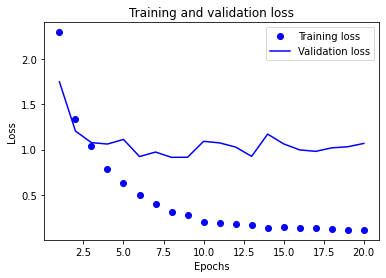

In [ ]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

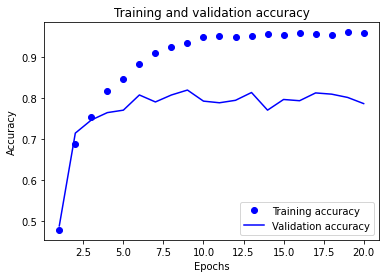

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Answer the following questions about Modified Model #1:

* What modification(s) did you make?

  **Ans:**
  *Added more dense layers and increasing the number of units in the dense layers*
* How did this impact accuracy?

  **Ans:**
  *Two more Dense layers with 256 units have been added to this improved model. The model's ability to learn difficult characteristics may be increased by adding additional layers with more units, which could result in better accuracy.*

# Modified Model #2

Now try modifying your model in a different way. You can modify it in one of the ways I've suggested below, or come up with your own modification.

Modification suggestions:
* Use more dense layers
* Use fewer dense layers
* Change the number of units in the dense layers
* Use more or fewer than the 10,000 most-popular words

# ***Using fewer dense layers and increasing the number of units in the dense layers***

---



In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 2s 96ms/step - loss: 2.3244 - accuracy: 0.5753 - val_loss: 1.5474 - val_accuracy: 0.6700
Epoch 2/20
16/16 [==============================] - 1s 84ms/step - loss: 1.2796 - accuracy: 0.7354 - val_loss: 1.1943 - val_accuracy: 0.7510
Epoch 3/20
16/16 [==============================] - 1s 78ms/step - loss: 0.9515 - accuracy: 0.8067 - val_loss: 1.0434 - val_accuracy: 0.7830
Epoch 4/20
16/16 [==============================] - 1s 75ms/step - loss: 0.7487 - accuracy: 0.8457 - val_loss: 0.9364 - val_accuracy: 0.8150
Epoch 5/20
16/16 [==============================] - 1s 78ms/step - loss: 0.6043 - accuracy: 0.8806 - val_loss: 0.8766 - val_accuracy: 0.8210
Epoch 6/20
16/16 [==============================] - 1s 79ms/step - loss: 0.4939 - accuracy: 0.9025 - val_loss: 0.8321 - val_accuracy: 0.8230
Epoch 7/20
16/16 [==============================] - 1s 76ms/step - loss: 0.4139 - accuracy: 0.9158 - val_loss: 0.8055 - val_accuracy: 0.8270
Epoch 8/20
16

*After testing with just 1 hidden layer but with increased number of nodes produced the same results as to when we increase the number of layers and number of nodes, and here also we were able to achieve the accuracy of 0.95 on epoch 13. This shows increasing the number of nodes in a sigle hidden layer is better then creating multiple hidden layer.*

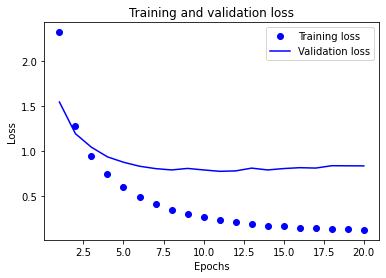

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

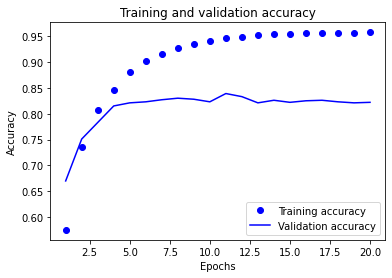

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Answer the following questions about Modified Model #2:

* What modification(s) did you make?

  **Ans:**
  *Using fewer dense layers and increasing the number of units in the dense layers*
* How did this impact accuracy?
  
  **Ans:** *The model's accuracy can be improved by increasing the number of units in a dense layer, which allows the model to learn more complex representations of the input data. Using fewer dense layers, on the other hand, can reduce the model's accuracy by reducing the number of transformations that the input data goes through. Reduce the number of dense layers from two to one while increasing the number of units in that layer from 64 to 128.*